# **Reconhecimento de Dígitos escritos à mão com SVM**  

👋 E aí, pronto para ensinar uma máquina a reconhecer números escritos à mão?

Neste notebook, vamos usar **Support Vector Machines (SVM)** para transformar rabiscos em dados com o famoso **dataset MNIST**.  

## **O Que Vamos Fazer?**  
**⮑** Treinar um modelo que olha para imagens de **28x28 pixels** e identifica números de **0 a 9**.  

## **Como Vamos Chegar Lá?**  

**1️⃣ Coleta de Dados**

**⮑** Baixamos o dataset **MNIST**: são **60.000 imagens de treino** e **10.000 de teste**.  

**2️⃣ Pré-processamento**

**⮑** Normalizamos os pixels para ficarem entre **0 e 1**.  
**⮑** Transformamos cada imagem em um vetor de **784 números** (porque 28×28 = 784).  
**⮑** Separamos tudo em **treino, validação e teste**.  

**3️⃣ Treinamento**

**⮑** Usamos um **SVM com kernel RBF** para ensinar o modelo a diferenciar os números.  

**4️⃣ Avaliação**   

**⮑** Testamos a precisão do modelo.  
**⮑** Mostramos alguns exemplos para ver se ele aprendeu direitinho.  

---

# Como Funciona o Treinamento e Avaliação de Modelos

## **Treino → O estudante estudando** 📖

Aqui, o modelo aprende com os exemplos disponíveis.  
Ele ajusta seus "conhecimentos" (parâmetros) com base nesses dados.  
É como um aluno lendo livros e fazendo exercícios para aprender o conteúdo.  

---

## **Validação → Simulado antes da prova** ✍️

Esse conjunto serve para testar diferentes estratégias antes da prova real.  
O aluno faz simulados para ver quais técnicas de estudo funcionam melhor.  
No caso do modelo, isso significa ajustar hiperparâmetros para evitar overfitting.  
Ele já viu dados parecidos (porque vieram do treino), mas nunca exatamente esses exemplos.  

---

## **Teste → A prova oficial** 🎓

O modelo precisa mostrar o que aprendeu em dados totalmente novos.  
Assim como um aluno que nunca viu as questões exatas da prova antes.  
Esse conjunto não pode ser usado para ajuste, apenas para medir o desempenho real do modelo.



     🔍 INFORMAÇÕES DO DATASET MNIST     
⮑ Número de imagens de treino : 60.000
⮑ Número de imagens de teste  : 10.000
⮑ Formato das imagens         : 28x28 pixels
⮑ Rótulos disponíveis         : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
----------------------------------------



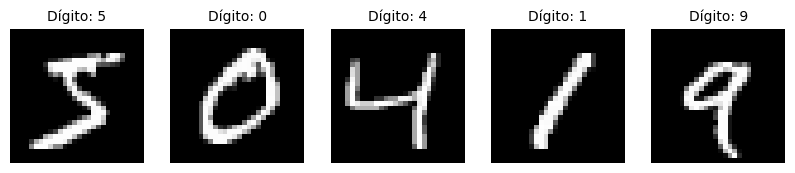


        🎲 ESTRUTURA DOS CONJUNTOS DE DADOS        
⮑ Conjunto de Treino     : (48.000, 784 px)
⮑ Conjunto de Validação  : (12.000, 784 px)
⮑ Conjunto de Teste      : (10.000, 784 px)
--------------------------------------------------


            🏋️ TREINANDO O MODELO SVM             
        Isso pode levar alguns minutos...         
--------------------------------------------------


              📈 RESULTADOS DO MODELO              
⮑ Precisão do modelo na validação: 98.31%
⮑ Precisão final do modelo no teste: 98.18%
--------------------------------------------------



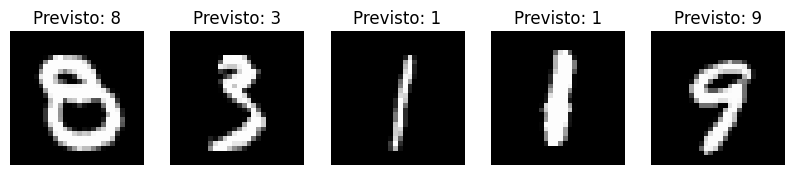

In [ ]:
# ========================================================
#                    COLETA DE DADOS
# ========================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Carregar o dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

largura = 40
separador_igual = "="
separador_hifen = "-"

print("\n" + separador_igual * largura)
print("🔍 INFORMAÇÕES DO DATASET MNIST".center(largura))
print(separador_igual * largura)
print(f"⮑ Número de imagens de treino : {X_train.shape[0]:,}".replace(",", "."))
print(f"⮑ Número de imagens de teste  : {X_test.shape[0]:,}".replace(",", "."))
print(f"⮑ Formato das imagens         : {X_train.shape[1]}x{X_train.shape[2]} pixels")
print(f"⮑ Rótulos disponíveis         : {sorted(set(map(int, y_train)))}")
print(separador_hifen * largura + "\n")

# Exibir algumas imagens
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Dígito: {y_train[i]}", fontsize=10)
    ax.axis("off")

plt.show()

# ========================================================
#             PRÉ-PROCESSAMENTO DOS DADOS
# ========================================================

from sklearn.model_selection import train_test_split

# Normalizar os pixels (deixar os valores entre 0 e 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
largura = 50

# Transformar as imagens 28x28 em vetores de 784 posições (28x28 = 784)
X_train = X_train.reshape(X_train.shape[0], -1)  # 60.000 imagens → (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)  # 10.000 imagens → (10000, 784)

# Dividir os dados de treino em treino e validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("\n" + separador_igual * largura)
print("🎲 ESTRUTURA DOS CONJUNTOS DE DADOS".center(largura))
print(separador_igual * largura)
print(f"⮑ Conjunto de Treino     : ({'{:,}'.format(X_train.shape[0]).replace(',', '.')}, {X_train.shape[1]} px)")
print(f"⮑ Conjunto de Validação  : ({'{:,}'.format(X_val.shape[0]).replace(',', '.')}, {X_val.shape[1]} px)")
print(f"⮑ Conjunto de Teste      : ({'{:,}'.format(X_test.shape[0]).replace(',', '.')}, {X_test.shape[1]} px)")
print(separador_hifen * largura + "\n")

# ========================================================
#                TREINANDO O MODELO SVM
# ========================================================

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Criar o modelo SVM com kernel RBF
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)

# Treinar o modelo com os dados de treino
print("\n" + separador_igual * largura)
print("🏋️ TREINANDO O MODELO SVM".center(largura))
print("Isso pode levar alguns minutos...".center(largura))
print(separador_hifen * largura + "\n")
svm_model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_val_pred = svm_model.predict(X_val)

# Calcular a precisão no conjunto de validação
accuracy = accuracy_score(y_val, y_val_pred)

# ========================================================
#                     TESTAR O MODELO
# ========================================================

# Fazer previsões no conjunto de teste
y_test_pred = svm_model.predict(X_test)

# Calcular a precisão final no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + separador_igual * largura)
print("📈 RESULTADOS DO MODELO".center(largura))
print(separador_igual * largura)
print(f"⮑ Precisão do modelo na validação: {accuracy * 100:.2f}%")
print(f"⮑ Precisão final do modelo no teste: {test_accuracy * 100:.2f}%")
print(separador_hifen * largura + "\n")

# Exibir previsões aleatórias
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
random_indices = np.random.choice(len(X_test), 5, replace=False)  # Seleciona 5 índices aleatórios

for i, ax in enumerate(axes):
    idx = random_indices[i]  # Pega um índice aleatório
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Previsto: {y_test_pred[idx]}")
    ax.axis("off")

plt.show()

### **Exibição de Números do MNIST**

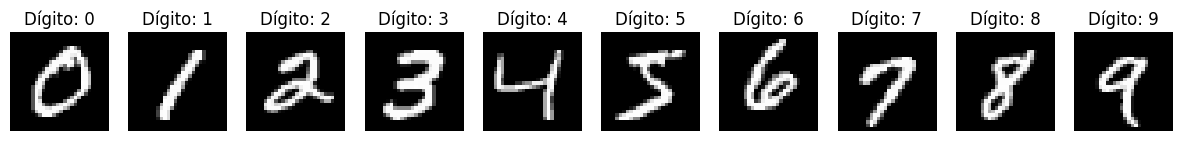

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Carregar o dataset MNIST
(X_train, y_train), (_, _) = mnist.load_data()

# Função para exibir os números de 0 a 9
def exibir_numeros():
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))

    for i in range(10):
        # Encontrar a primeira imagem correspondente ao número i
        idx = (y_train == i).argmax()
        axes[i].imshow(X_train[idx], cmap='gray')
        axes[i].set_title(f"Dígito: {i}")
        axes[i].axis("off")

    plt.show()

# Chamar a função para exibir as imagens de 0 a 9
exibir_numeros()


### **Download do Modelo Treinado**

In [ ]:
import pickle
from google.colab import files

# Salvar o modelo treinado como 'svm_model.pkl'
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

print("Modelo treinado salvo como svm_model.pkl")

# Baixar o arquivo .pkl para o seu PC
files.download("svm_model.pkl")


Modelo treinado salvo como svm_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **MNIST em 2D usando PCA**

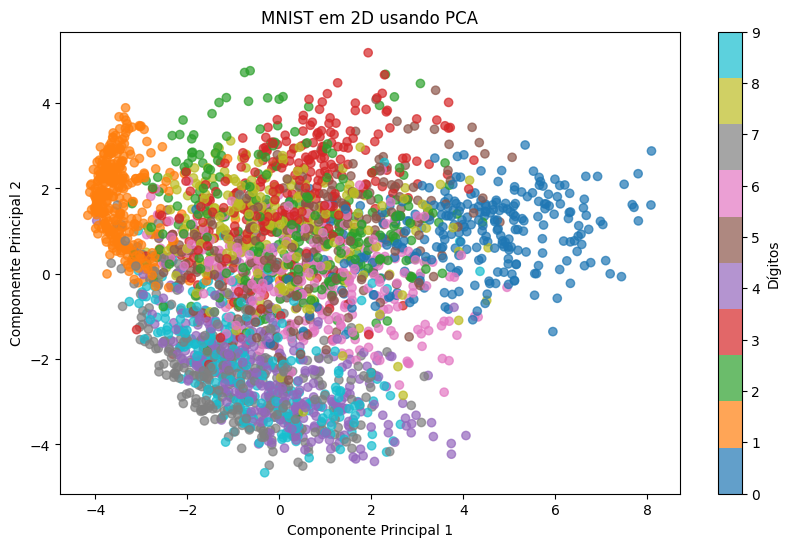

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Carregar dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Normalizar e achatar as imagens (28x28 -> 784)
X_train = X_train / 255.0
X_train = X_train.reshape(X_train.shape[0], -1)

# Reduzir para 2D com PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train[:3000])  # Usando 3000 amostras para visualização

# Plot 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train[:3000], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Dígitos')
plt.title('MNIST em 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


### **MNIST em 3D usando PCA**

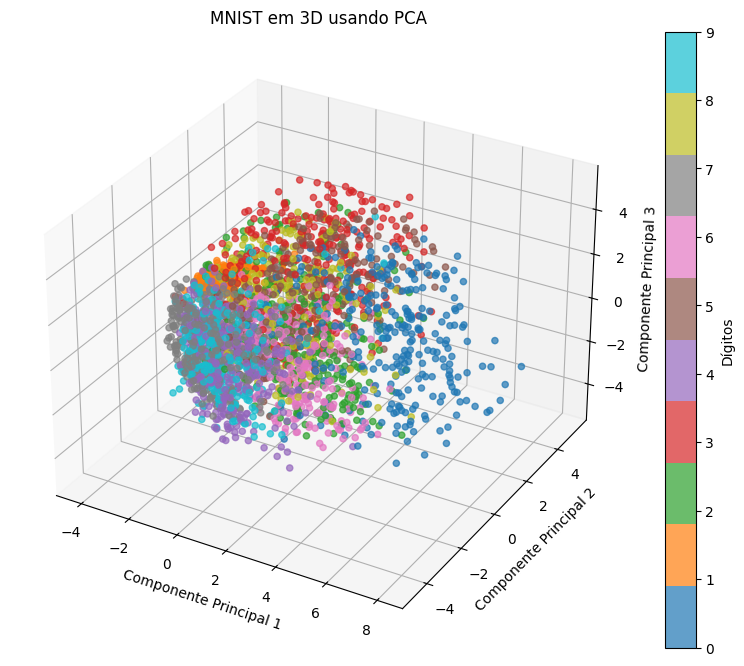

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from mpl_toolkits.mplot3d import Axes3D

# Carregar dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Normalizar e achatar as imagens (28x28 -> 784)
X_train = X_train / 255.0
X_train = X_train.reshape(X_train.shape[0], -1)

# Reduzir para 3D com PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train[:3000])  # Usando 3000 amostras para visualização

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_train[:3000], cmap='tab10', alpha=0.7)
ax.set_title('MNIST em 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Adicionar barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Dígitos')

plt.show()
